In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import roc_curve, auc

In [3]:
df=pd.read_csv('bank.csv')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [6]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [8]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000


<AxesSubplot:>

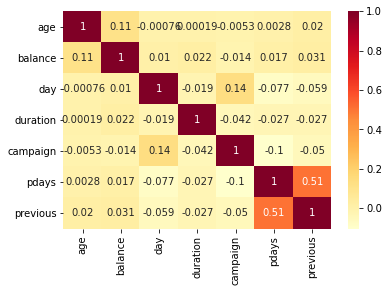

In [9]:
sns.heatmap(df.corr(),cmap='YlOrRd',  annot=True)

<AxesSubplot:>

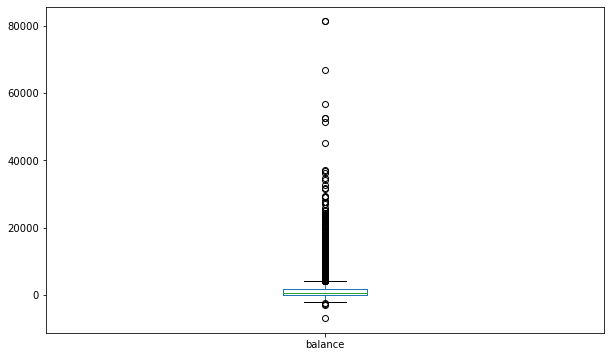

In [10]:
plt.figure(figsize=(10,6))
df.balance.plot(kind='box')

In [11]:
df['balance'].describe()

count    11162.000000
mean      1528.538524
std       3225.413326
min      -6847.000000
25%        122.000000
50%        550.000000
75%       1708.000000
max      81204.000000
Name: balance, dtype: float64

In [27]:
IQR=1708-122
otlr1=122-(1.5*IQR)
otlr1

-2257.0

In [28]:
otlr2=1708+(1.5*IQR)
otlr2

4087.0

In [12]:
df.drop(df[df['balance']>1708].index,axis=0,inplace=True)
df.drop(df[df['balance']<122].index,axis=0,inplace=True)

In [13]:
df['balance'].describe()

count    5589.000000
mean      660.610664
std       429.649684
min       122.000000
25%       298.000000
50%       550.000000
75%       950.000000
max      1708.000000
Name: balance, dtype: float64

<AxesSubplot:>

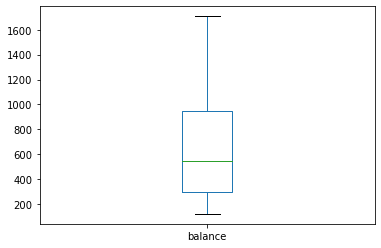

In [14]:
df.balance.plot(kind='box')

<AxesSubplot:>

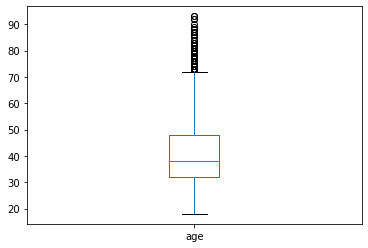

In [15]:
df.age.plot(kind='box')

In [16]:
df['age'].describe()

count    5589.000000
mean       40.385758
std        11.693628
min        18.000000
25%        32.000000
50%        38.000000
75%        48.000000
max        93.000000
Name: age, dtype: float64

In [17]:
IQR=48-32
otlr1=32-(1.5*IQR)
otlr1

8.0

In [18]:
otlr2=48+(1.5*IQR)
otlr2

72.0

In [19]:
df.drop(df[df['age']>72].index,axis=0,inplace=True)

In [20]:
df['age'].describe()

count    5491.000000
mean       39.701694
std        10.583757
min        18.000000
25%        32.000000
50%        37.000000
75%        47.000000
max        72.000000
Name: age, dtype: float64

<AxesSubplot:>

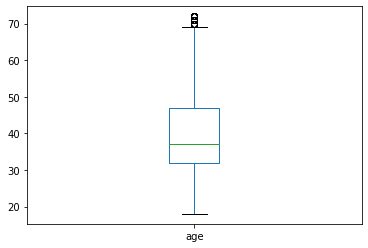

In [21]:
df.age.plot(kind='box')

<AxesSubplot:>

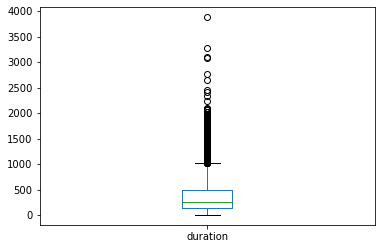

In [22]:
df.duration.plot(kind='box')

In [23]:
df['duration'].describe()

count    5491.000000
mean      374.021854
std       351.871371
min         2.000000
25%       138.000000
50%       257.000000
75%       492.000000
max      3881.000000
Name: duration, dtype: float64

In [24]:
iqr=492-138
otlr1=138-(1.5*iqr)
otlr1


-393.0

In [25]:
otlr2=492+(1.5*iqr)
otlr2

1023.0

In [26]:
df.drop(df[df['duration']>1023].index,inplace=True,axis=0)

In [27]:
df['duration'].describe()

count    5152.000000
mean      308.835016
std       233.307322
min         2.000000
25%       132.000000
50%       241.000000
75%       421.000000
max      1022.000000
Name: duration, dtype: float64

<AxesSubplot:>

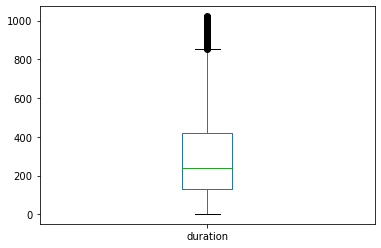

In [28]:
df.duration.plot(kind='box')

<AxesSubplot:>

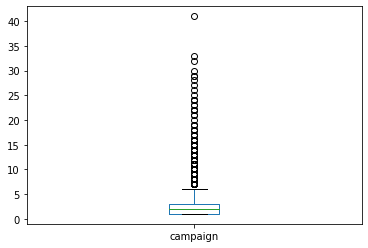

In [29]:
df.campaign.plot(kind='box')

In [30]:
df['campaign'].describe()

count    5152.000000
mean        2.474573
std         2.669408
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        41.000000
Name: campaign, dtype: float64

In [31]:
df.drop(df[df['campaign']>3].index,axis=0,inplace=True)

In [32]:
df['campaign'].describe()

count    4247.000000
mean        1.608665
std         0.725617
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: campaign, dtype: float64

<AxesSubplot:>

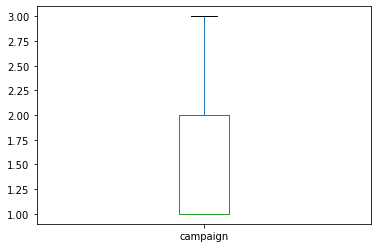

In [33]:
df.campaign.plot(kind='box')

<AxesSubplot:>

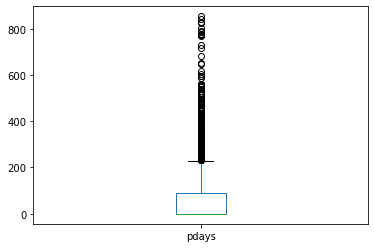

In [34]:
df.pdays.plot(kind='box')

In [35]:
df['pdays'].describe()

count    4247.000000
mean       61.254768
std       119.953801
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        91.000000
max       854.000000
Name: pdays, dtype: float64

In [36]:
df.drop(df[df['pdays']>91].index,axis=0,inplace=True)

In [37]:
df['pdays'].describe()

count    3188.000000
mean        3.725220
std        19.171867
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max        91.000000
Name: pdays, dtype: float64

In [38]:
df['campaign'].describe()

count    3188.000000
mean        1.619511
std         0.727657
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: campaign, dtype: float64

<AxesSubplot:>

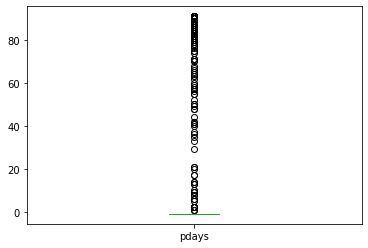

In [61]:
df.pdays.plot(kind='box')

In [54]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
14,31,technician,single,tertiary,no,703,yes,no,unknown,8,may,943,2,-1,0,unknown,yes
16,32,blue-collar,single,primary,no,611,yes,no,unknown,8,may,541,3,-1,0,unknown,yes
19,49,admin.,divorced,secondary,no,168,yes,yes,unknown,8,may,513,1,-1,0,unknown,yes
20,28,admin.,divorced,secondary,no,785,yes,no,unknown,8,may,442,2,-1,0,unknown,yes


###### Data Preprocessing

In [72]:
def preprocessor(df):
    res_df=df.copy()
    le= preprocessing.LabelEncoder()
    res_df['job']=le.fit_transform(res_df['job'])
    res_df['marital']=le.fit_transform(res_df['marital'])
    res_df['education']=le.fit_transform(res_df['education'])
    res_df['default']=le.fit_transform(res_df['default'])
    res_df['housing']=le.fit_transform(res_df['housing'])
    res_df['loan']=le.fit_transform(res_df['loan'])
    res_df['month']=le.fit_transform(res_df['month'])
    res_df['poutcome']=le.fit_transform(res_df['poutcome'])
    res_df['deposit']=le.fit_transform(res_df['deposit'])
    res_df['contact']=le.fit_transform(res_df['contact'])

    return res_df

In [73]:
encoded_df = preprocessor(df)


In [74]:
encoded_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
14,31,9,2,2,0,703,1,0,2,8,8,943,2,-1,0,3,1
16,32,1,2,0,0,611,1,0,2,8,8,541,3,-1,0,3,1
19,49,0,0,1,0,168,1,1,2,8,8,513,1,-1,0,3,1
20,28,0,0,1,0,785,1,0,2,8,8,442,2,-1,0,3,1


In [77]:
x= encoded_df.iloc[:,:-1]
y = encoded_df['deposit'].values

In [78]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3
14,31,9,2,2,0,703,1,0,2,8,8,943,2,-1,0,3
16,32,1,2,0,0,611,1,0,2,8,8,541,3,-1,0,3
19,49,0,0,1,0,168,1,1,2,8,8,513,1,-1,0,3
20,28,0,0,1,0,785,1,0,2,8,8,442,2,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11143,38,10,0,1,0,189,1,1,0,21,5,105,2,-1,0,3
11150,34,4,1,1,0,355,0,0,0,21,1,314,3,-1,0,3
11151,40,4,1,2,0,917,1,0,2,20,8,292,1,-1,0,3
11152,34,3,1,1,0,390,1,0,0,15,5,659,3,-1,0,3


In [81]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#### Build Decision Tree Model

##### Decision Tree with CART algo (GINI)

###### DT with depth 2

In [84]:
model_dt_2 = DecisionTreeClassifier(random_state=1,max_depth=2)

model_dt_2.fit(x_train,y_train)

model_dt_2_score_train = model_dt_2.score(x_train,y_train)

model_dt_2_score_test = model_dt_2.score(x_test,y_test)

model_dt_2_score_test
model_dt_2_score_train

0.7094117647058824

In [86]:
model_dt_4=DecisionTreeClassifier(max_depth=4,random_state=1)
model_dt_4.fit(x_train,y_train)
model_dt_4_train_score=model_dt_4.score(x_train,y_train)
model_dt_4_test_score=model_dt_4.score(x_test,y_test)
print(model_dt_4_test_score)
print(model_dt_4_train_score)

0.7601880877742947
0.7752941176470588


In [89]:
model_dt_6=DecisionTreeClassifier(max_depth=6,random_state=1)
model_dt_6.fit(x_train,y_train)
model_dt_6_train_score=model_dt_6.score(x_train,y_train)
model_dt_6_test_score=model_dt_6.score(x_test,y_test)
print(model_dt_6_test_score)

0.7978056426332288


In [90]:
model_dt_8=DecisionTreeClassifier(max_depth=8, random_state=1)

model_dt_8.fit(x_train,y_train)

model_dt_8_test_score=model_dt_8.score(x_test,y_test)
print(model_dt_8_test_score)

0.799373040752351


##### DT with C4.5(Entropy)

In [111]:
model_dt=DecisionTreeClassifier(random_state=1,criterion='entropy')
model_dt.fit(x_train,y_train)

y_pred_dt=model_dt.predict_proba(x_test)[:,1]

print(y_pred_dt)
model_dt_test_score=model_dt.score(x_test,y_test)
print(model_dt_test_score)

[0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1.
 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0.
 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1.
 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1.

In [105]:
%pip install graphviz 
%conda install graphviz
from io import StringIO

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.11.0               |   py38haa95532_0        14.4 MB
    graphviz-2.38              |       hfd603c8_2        29.3 MB
    ------------------------------------------------------------
                                           Total:        43.7 MB

The following NEW packages will be INSTALLED:

  graphviz           pkgs/main/win-64::graphviz-2.38-hfd603c8_2

The following packages will be UPDATED:

  conda                               4.10.3-py38haa95532_0 --> 4.11.0-py38haa95532_0




graphviz-2.38        | 29.3 MB   |            |   0% 
graphviz-2.38        | 29.3 MB   |            |   0% 
graphviz-2.38        | 29


EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda3




In [107]:
plt.figure(figsize=(10,6))
dot_data=StringIO()
export_graphviz(model_dt_8,out_file=dot_data,
               filled=True,rounded=True,
               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

NameError: name 'export_graphviz' is not defined

<Figure size 720x432 with 0 Axes>

###### Performance matrix

In [116]:
fpr_dt,tpr_dt,_=roc_curve(y_test,y_pred_dt)
roc_auc_dt = auc(fpr_dt,tpr_dt)

In [118]:
predictions=model_dt_6.predict(x_test)
print(model_dt_6.score(x_test,y_test))
y_actual_res=y_test
print(y_actual_res)

0.7978056426332288
[0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0
 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0
 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1
 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1
 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1
 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0
 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1
 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 1 1
 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1
 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 0

In [119]:
print(predictions)

[0 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0
 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1
 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1
 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0
 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1
 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 0 0 1 0 0 1 0 0 0 1 

In [120]:
df_predictor_without_target=encoded_df.iloc[:,:-1]
df_predictor_only_target=encoded_df['deposit'].values

In [122]:
df_predictor_without_target.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3
14,31,9,2,2,0,703,1,0,2,8,8,943,2,-1,0,3


In [124]:
print(df_predictor_only_target)

[1 1 1 ... 0 0 0]


In [127]:
predictions1=model_dt_6.predict(df_predictor_without_target)

In [128]:
encoded_df['test data']=np.where(df_predictor_only_target,predictions1,df_predictor_only_target)
df['test data']=np.where(df_predictor_only_target,predictions1,df_predictor_only_target)

In [129]:
encoded_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,test data
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1,1
14,31,9,2,2,0,703,1,0,2,8,8,943,2,-1,0,3,1,1
16,32,1,2,0,0,611,1,0,2,8,8,541,3,-1,0,3,1,1
19,49,0,0,1,0,168,1,1,2,8,8,513,1,-1,0,3,1,0
20,28,0,0,1,0,785,1,0,2,8,8,442,2,-1,0,3,1,0


In [132]:
df['test data'].replace(to_replace=1, value='True', inplace=True)
df['test data'].replace(to_replace=0, value='False', inplace=True)

In [133]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,test data
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,True
14,31,technician,single,tertiary,no,703,yes,no,unknown,8,may,943,2,-1,0,unknown,yes,True
16,32,blue-collar,single,primary,no,611,yes,no,unknown,8,may,541,3,-1,0,unknown,yes,True
19,49,admin.,divorced,secondary,no,168,yes,yes,unknown,8,may,513,1,-1,0,unknown,yes,False
20,28,admin.,divorced,secondary,no,785,yes,no,unknown,8,may,442,2,-1,0,unknown,yes,False


In [135]:
con_mat=confusion_matrix(y_test,predictions)
print(con_mat)

[[329  49]
 [ 80 180]]


<AxesSubplot:>

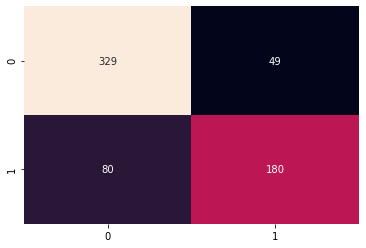

In [137]:
sns.heatmap(con_mat, annot=True, fmt='d', cbar=False)

In [136]:
print(accuracy_score(y_test,predictions))

0.7978056426332288
